In [192]:
import numpy as np
import pandas as pd
from pathlib import Path
import torch
from torch import nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
import os
import glob
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn import datasets, linear_model, metrics

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split
pd.set_option('display.max_colwidth', None)

np.random.seed(0)

In [193]:
data_dir = Path('./Data_Files')

In [194]:
# Params
params = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

In [195]:
df1 = pd.read_csv(data_dir / "+60degrees.csv", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df2 = pd.read_csv(data_dir / "0degrees.csv", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df3 = pd.read_csv(data_dir / "16cm_away.csv", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df4 = pd.read_csv(data_dir / "180.csv", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df5 = pd.read_csv(data_dir / "32cm_away.csv", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df6 = pd.read_csv(data_dir / "80cm_away.csv", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df7 = pd.read_csv(data_dir / "air.csv", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df8 = pd.read_csv(data_dir / "minus_60degrees.csv", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df9 = pd.read_csv(data_dir / "no_air_.csv", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df10 = pd.read_csv(data_dir / "vent_air.csv", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df11 = pd.read_csv(data_dir / "very_close_to_vent.csv", low_memory=False, names= ['frequency','amplitude'] , index_col = False)

In [196]:
data_dir2 = Path("./Jun30_data_files/")

In [197]:
# for dir,subdir,files in os.walk(data_dir2):
#     for i in files:
#         print (i)
#         if i=="test2.txt" and i == "TEST2.TXT.sb-5b453c2d-NvFVlZ":
#             continue
#         dataframe = pd.read_csv(data_dir2 / i, low_memory=False, names= ['frequency','amplitude'] , index_col = False)
#         dataframe = dataframe[dataframe['frequency'] != "clocktime"]
#         print(dataframe)
#         dataframe = dataframe.dropna()
#         #dataframe = dataframe[:129]
#         #print(dataframe[:129*7])
#         df12 = df12.append(dataframe)

In [198]:
df12 = pd.read_csv(data_dir2 / "Dist1_4.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df12 = df12[df12['frequency'] != "clocktime"]


df13 = pd.read_csv(data_dir2 / "Dist1_6.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df13 = df13[df13['frequency'] != "clocktime"]


df14 = pd.read_csv(data_dir2 / "Dist1_8.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df14 = df14[df14['frequency'] != "clocktime"]


df15 = pd.read_csv(data_dir2 / "Dist1.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df15 = df15[df15['frequency'] != "clocktime"]
df15 = df15[:129*2]

df16 = pd.read_csv(data_dir2 / "Dist2.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df16 = df16[df16['frequency'] != "clocktime"]

df17 = pd.read_csv(data_dir2 / "Dist1_2.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df17 = df17[df17['frequency'] != "clocktime"]

df18 = pd.read_csv(data_dir2 / "Dist0_5.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df18 = df18[df18['frequency'] != "clocktime"]

df19 = pd.read_csv(data_dir2 / "Dist0_3.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df19 = df19[df19['frequency'] != "clocktime"]


In [199]:
df19[:129]

,frequency,amplitude
0,0.00,62997.4405
1,62.50,27144.8022
2,125.00,200.6097
3,187.50,174.9460
4,250.00,155.6979
...,...,...
124,3812.50,6.6091
125,3875.00,3.3312
126,3937.50,8.6702
127,4000.00,4.8962


In [200]:
data_dir3 = Path("./July1_data_files/") 

df20 = pd.read_csv(data_dir3 / "Dist10cm.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df20 = df20[df20['frequency'] != "clocktime"]

df21 = pd.read_csv(data_dir3 / "Dist15cm.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df21 = df21[df21['frequency'] != "clocktime"]
df21 = df21[:129*4]

df22 = pd.read_csv(data_dir3 / "Dist20cm.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df22 = df22[df22['frequency'] != "clocktime"]

df23 = pd.read_csv(data_dir3 / "Dist25cm.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df23 = df23[df23['frequency'] != "clocktime"]

df24 = pd.read_csv(data_dir3 / "Dist30cm.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df24 = df24[df24['frequency'] != "clocktime"]


In [201]:
df21[:129*2]

,frequency,amplitude
0,0.00,64181.0745
1,62.50,27679.9321
2,125.00,805.2501
3,187.50,612.9744
4,250.00,54.4231
...,...,...
254,4687.50,2.0852
255,4750.00,4.8306
256,4812.50,6.7667
257,4875.00,4.1614


In [202]:
data_dir4 = Path("./July8/") 

df25 = pd.read_csv(data_dir4 / "check.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df25 = df25[df25['frequency'] != "clocktime"]
df25 = df25.dropna()
df25

,frequency,amplitude
0,0.00,54508.3419
1,62.50,23471.8577
2,125.00,222.4883
3,187.50,65.2300
4,250.00,22.4759
...,...,...
18844,7750.00,34.0706
18845,7812.50,72.1740
18846,7875.00,45.6315
18847,7937.50,12.6362


In [203]:
data_dir5 = Path("./19July/") 

df26 = pd.read_csv(data_dir5 / "check.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df26 = df26[df26['frequency'] != "clocktime"]
df26 = df26.dropna()


df27 = pd.read_csv(data_dir5 / "desk.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df27 = df27[df27['frequency'] != "clocktime"]
df27 = df27.dropna()

df28 = pd.read_csv(data_dir5 / "desk2.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df28 = df28[df28['frequency'] != "clocktime"]
df28 = df28.dropna()




In [204]:
df26 = df26[:129*145]

In [205]:
df28 = df28[:129*180]

In [206]:
data_dir6 = Path("./new_files_july23/") 

df29 = pd.read_csv(data_dir6 / "desk.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df29 = df29[df29['frequency'] != "clocktime"]
df29 = df29.dropna()

df30 = pd.read_csv(data_dir6 / "no_air.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df30 = df30[df30['frequency'] != "clocktime"]
df30 = df30.dropna()

df31 = pd.read_csv(data_dir6 / "onvent.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df31 = df31[df31['frequency'] != "clocktime"]
df31 = df31.dropna()

In [207]:
data_dir7 = Path("./final/") 

df32 = pd.read_csv(data_dir7 / "1m_v1.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df32 = df32[df32['frequency'] != "clocktime"]
df32 = df32.dropna()

df33 = pd.read_csv(data_dir7 / "fan_66cm.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df33 = df33[df33['frequency'] != "clocktime"]
df33 = df33.dropna()

df34 = pd.read_csv(data_dir7 / "50cm_v1.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df34 = df34[df34['frequency'] != "clocktime"]
df34 = df34.dropna()
# df34 = df34[:129*198]

df35 = pd.read_csv(data_dir7 / "150cm_v1.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df35 = df35[df35['frequency'] != "clocktime"]
df35 = df35.dropna()
# df35 = df35[:211*129]


data_dir8 = Path("./finale/") 
df36 = pd.read_csv(data_dir7 / "50cm_v1.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df36 = df36[df36['frequency'] != "clocktime"]
df36 = df36.dropna()
# df36 = df36[:129*198]

df37 = pd.read_csv(data_dir7 / "1m_v1.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df37 = df37[df37['frequency'] != "clocktime"]
df37 = df37.dropna()
# df37 = df37[:129*198]

In [208]:
df34

,frequency,amplitude
0,0.00,67018.2937
1,62.50,28099.8738
2,125.00,876.9740
3,187.50,646.9032
4,250.00,1071.7751
...,...,...
25604,7750.00,6.6646
25605,7812.50,6.2637
25606,7875.00,4.8232
25607,7937.50,1.9443


In [209]:


df36[:129*210]

,frequency,amplitude
0,0.00,67018.2937
1,62.50,28099.8738
2,125.00,876.9740
3,187.50,646.9032
4,250.00,1071.7751
...,...,...
25604,7750.00,6.6646
25605,7812.50,6.2637
25606,7875.00,4.8232
25607,7937.50,1.9443


In [210]:
# df = df1.append([df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df16, df17, df18, df20, df22, df23, df24, df25, df26, df27, df28, df29, df30, df31, df32, df33])
df = df29.append([df30, df31, df32, df33, df34, df35, df36, df37])


In [211]:
df = df.dropna()
df[:129*800]

,frequency,amplitude
0,0.00,74691.3654
1,62.50,31866.3058
2,125.00,285.2973
3,187.50,330.8644
4,250.00,68.8822
...,...,...
29894,7750.00,41.3127
29895,7812.50,26.5759
29896,7875.00,24.3431
29897,7937.50,1.7325


In [212]:
def convert(df: pd.DataFrame, frame_size=129):
    x = np.asarray(df.iloc[:, 1]).reshape(-1, frame_size)
#     x = x[x.shape[0]//10:-x.shape[0]//10]
    return x

In [213]:
# df = df[df.columns[1:2]]


In [214]:
data = convert(df)
data.shape


(1876, 129)

In [215]:
X = data[:,:-1]

X = X[:, :7]
X.shape

(1876, 7)

In [216]:
y = data[:, -1]
y.shape


(1876,)

In [217]:
print (X.shape, y.shape)

(1876, 7) (1876,)


In [218]:
print(max(y), min(y))
for i in range(len(y)):
    if i >= len(y):
        break
    if y[i]>35 or y[i]<1:
        print (i, y[i])
        X = np.delete(X, i, axis = 0)
        y = np.delete(y, i)
        

32.9 2.57


In [219]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [220]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)


GradientBoostingRegressor(learning_rate=0.01, max_depth=4, min_samples_split=5,
                          n_estimators=500)

In [221]:
from joblib import dump, load
dump(reg, "flowSense.joblib")

['flowSense.joblib']

In [222]:
y_pred = reg.predict(X_test)
y_train_pred = reg.predict(X_train)

In [223]:
print(y_pred[:5])
print(y_test[:5])

[28.80259073  8.94125074  6.67036677  5.63067296  5.88075359]
[28.11  4.77  9.91  4.41  5.76]


In [224]:
print(y_train_pred[:5])
print(y_train[:5])

[ 6.01441651  7.11011104  5.0086177   5.82858494 10.39404725]
[ 5.87  8.17  3.9   6.31 12.44]


In [225]:
print("MSE of test: ", mean_squared_error(y_test, y_pred))
print(y_pred.shape)

print("Test Reg score: ", reg.score(X_test, y_test))
    

MSE of test:  6.117211944922302
(376,)
Test Reg score:  0.9031382130641886


In [226]:
print("MSE of training: ",  mean_squared_error(y_train, y_train_pred))

print("Train Reg score: ", reg.score(X_train, y_train))

MSE of training:  3.673203898174165
Train Reg score:  0.9479844578813782


In [227]:
print (mean_squared_error(y_train, y_train_pred), "," ,  mean_squared_error(y_test, y_pred), reg.score(X_train, y_train), reg.score(X_test, y_test) )

3.673203898174165 , 6.117211944922302 0.9479844578813782 0.9031382130641886


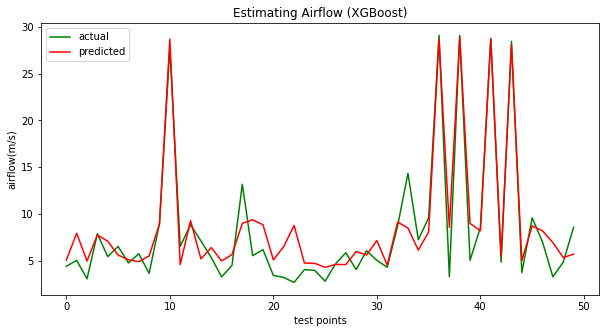

In [228]:
plt.figure(figsize=(10,5))
plt.plot(y_test[50:100], 'g', label="actual")
plt.plot(y_pred[50:100], 'r', label="predicted")
plt.legend()
plt.xlabel("test points")
plt.ylabel("airflow(m/s)")
plt.title("Estimating Airflow (XGBoost)")
plt.savefig("final.png")

Text(0.5, 1.0, 'Estimating Airflow (XGBoost)')

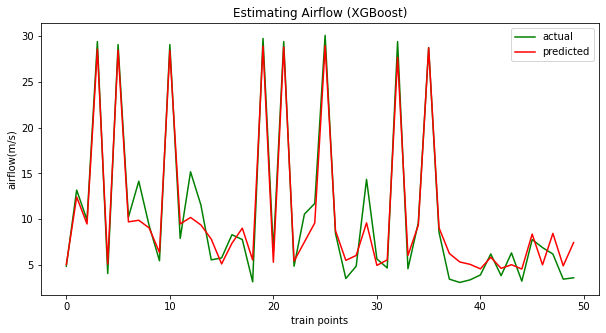

In [229]:
plt.figure(figsize=(10,5))
plt.plot(y_train[50:100], 'g', label="actual")
plt.plot(y_train_pred[50:100], 'r', label="predicted")
plt.legend()
plt.xlabel("train points")
plt.ylabel("airflow(m/s)")
plt.title("Estimating Airflow (XGBoost)")
# plt.savefig("1m_v1.jpg")

